Import Packages

In [18]:
import pandas as pd
import numpy as np
import missingno as msno

Collect and prepare the data

In [52]:
testdf = pd.read_csv("data/loan-test.csv")
traindf = pd.read_csv("data/loan-train.csv")

In [53]:
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
traindf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

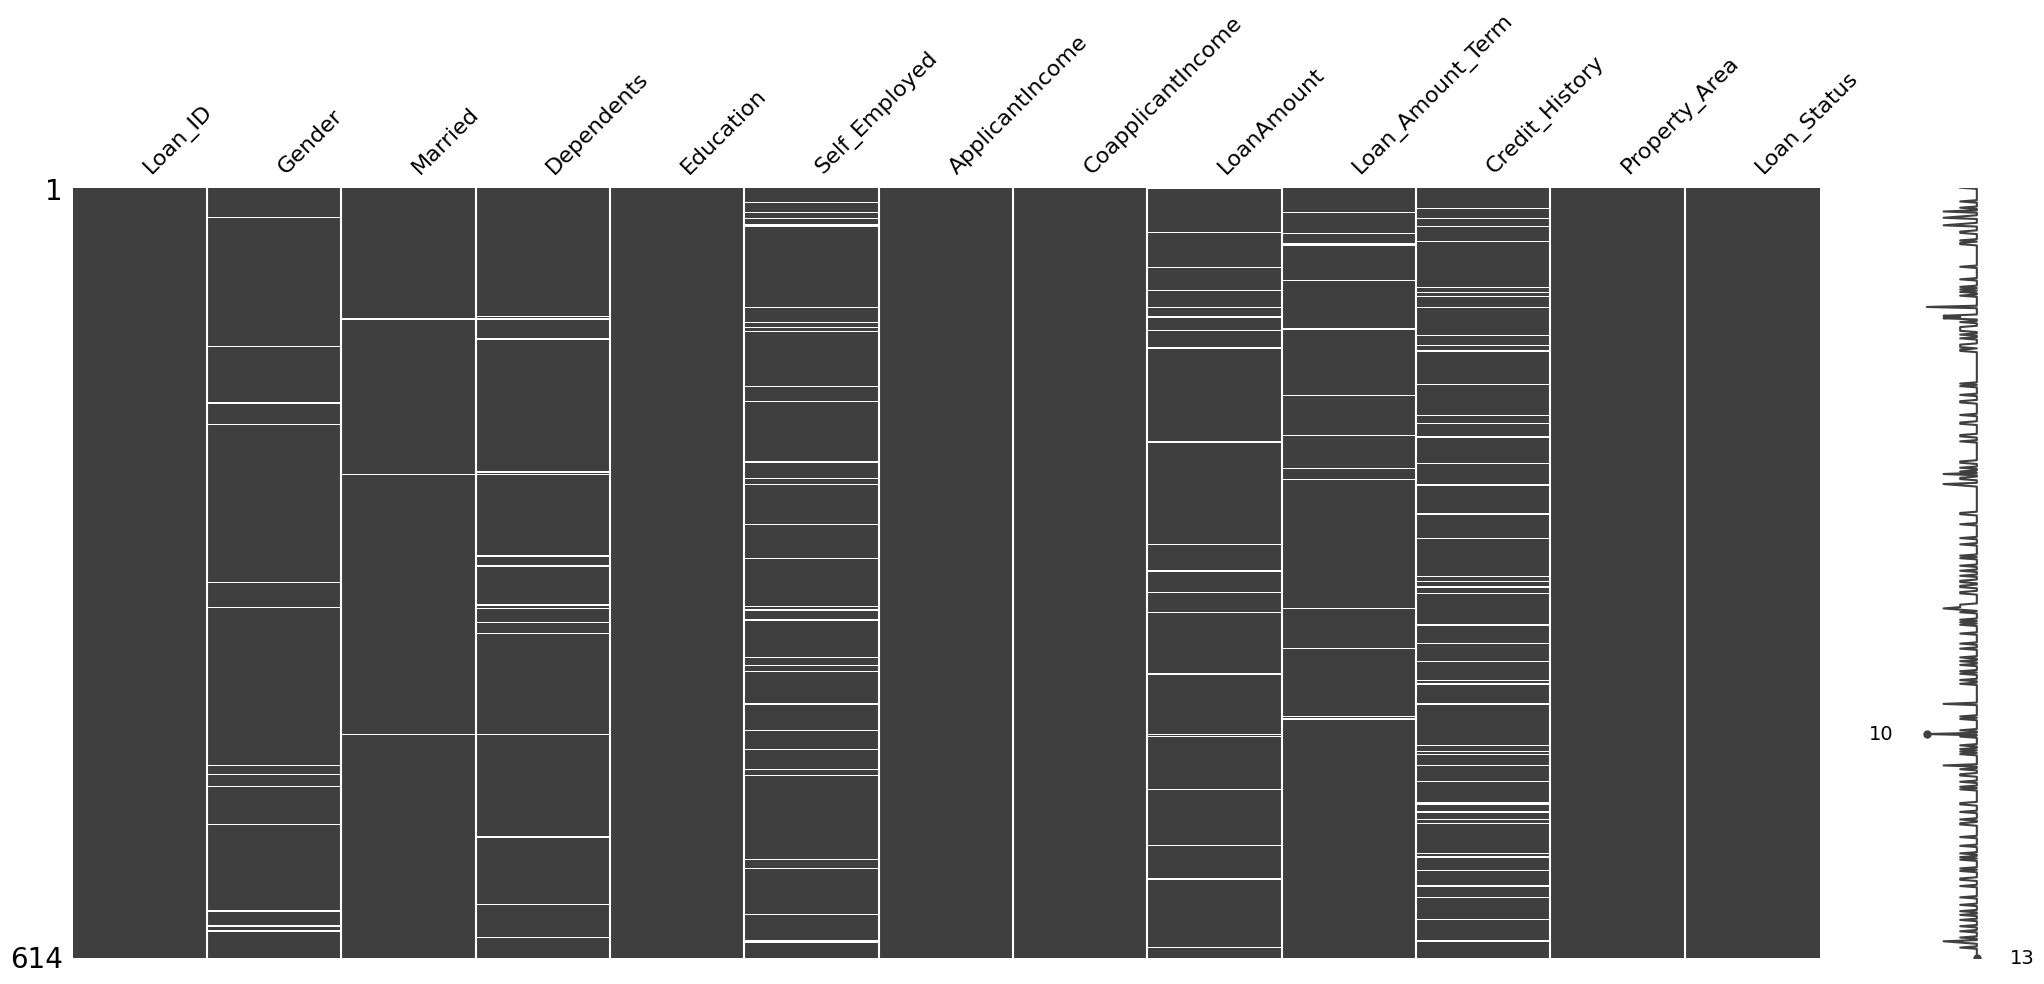

In [56]:
msno.matrix(traindf)

In [58]:
traindf['LoanAmount'] = traindf['LoanAmount'].fillna(traindf['LoanAmount'].mean())

In [59]:
traindf['Loan_Amount_Term'] = traindf['Loan_Amount_Term'].fillna(traindf['Loan_Amount_Term'].mean())

In [64]:
traindf['Credit_History'].fillna(traindf['Credit_History'].mode()[0], inplace=True)


C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\3088205597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindf['Credit_History'].fillna(traindf['Credit_History'].mode()[0], inplace=True)


In [66]:
traindf.Loan_Status = traindf.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

traindf.Gender = traindf.Gender.replace({"Male": 1, "Female" : 0})
traindf.Gender = traindf.Gender.replace({"Male": 1, "Female" : 0})

traindf.Married = traindf.Married.replace({"Yes": 1, "No" : 0})
traindf.Married = traindf.Married.replace({"Yes": 1, "No" : 0})

traindf.Self_Employed = traindf.Self_Employed.replace({"Yes": 1, "No" : 0})
traindf.Self_Employed = traindf.Self_Employed.replace({"Yes": 1, "No" : 0})

C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\2531878144.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traindf.Loan_Status = traindf.Loan_Status.replace({"Y": 1, "N" : 0})
C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\2531878144.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traindf.Gender = traindf.Gender.replace({"Male": 1, "Female" : 0})
C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\2531878144.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [69]:
traindf['Gender'].fillna(traindf['Gender'].mode()[0], inplace=True)
traindf['Married'].fillna(traindf['Married'].mode()[0], inplace=True)
traindf['Self_Employed'].fillna(traindf['Self_Employed'].mode()[0], inplace=True)
traindf['Dependents'].fillna(traindf['Dependents'].mode()[0], inplace=True)

C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\305795934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindf['Gender'].fillna(traindf['Gender'].mode()[0], inplace=True)
C:\Users\My plus computers\AppData\Local\Temp\ipykernel_51908\305795934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [90]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    traindf[col] = le.fit_transform(traindf[col])
    traindf[col] = le.fit_transform(traindf[col])

In [103]:
traindf['Loan_ID'] = 1

In [91]:
traindf.shape

(614, 13)

<Axes: >

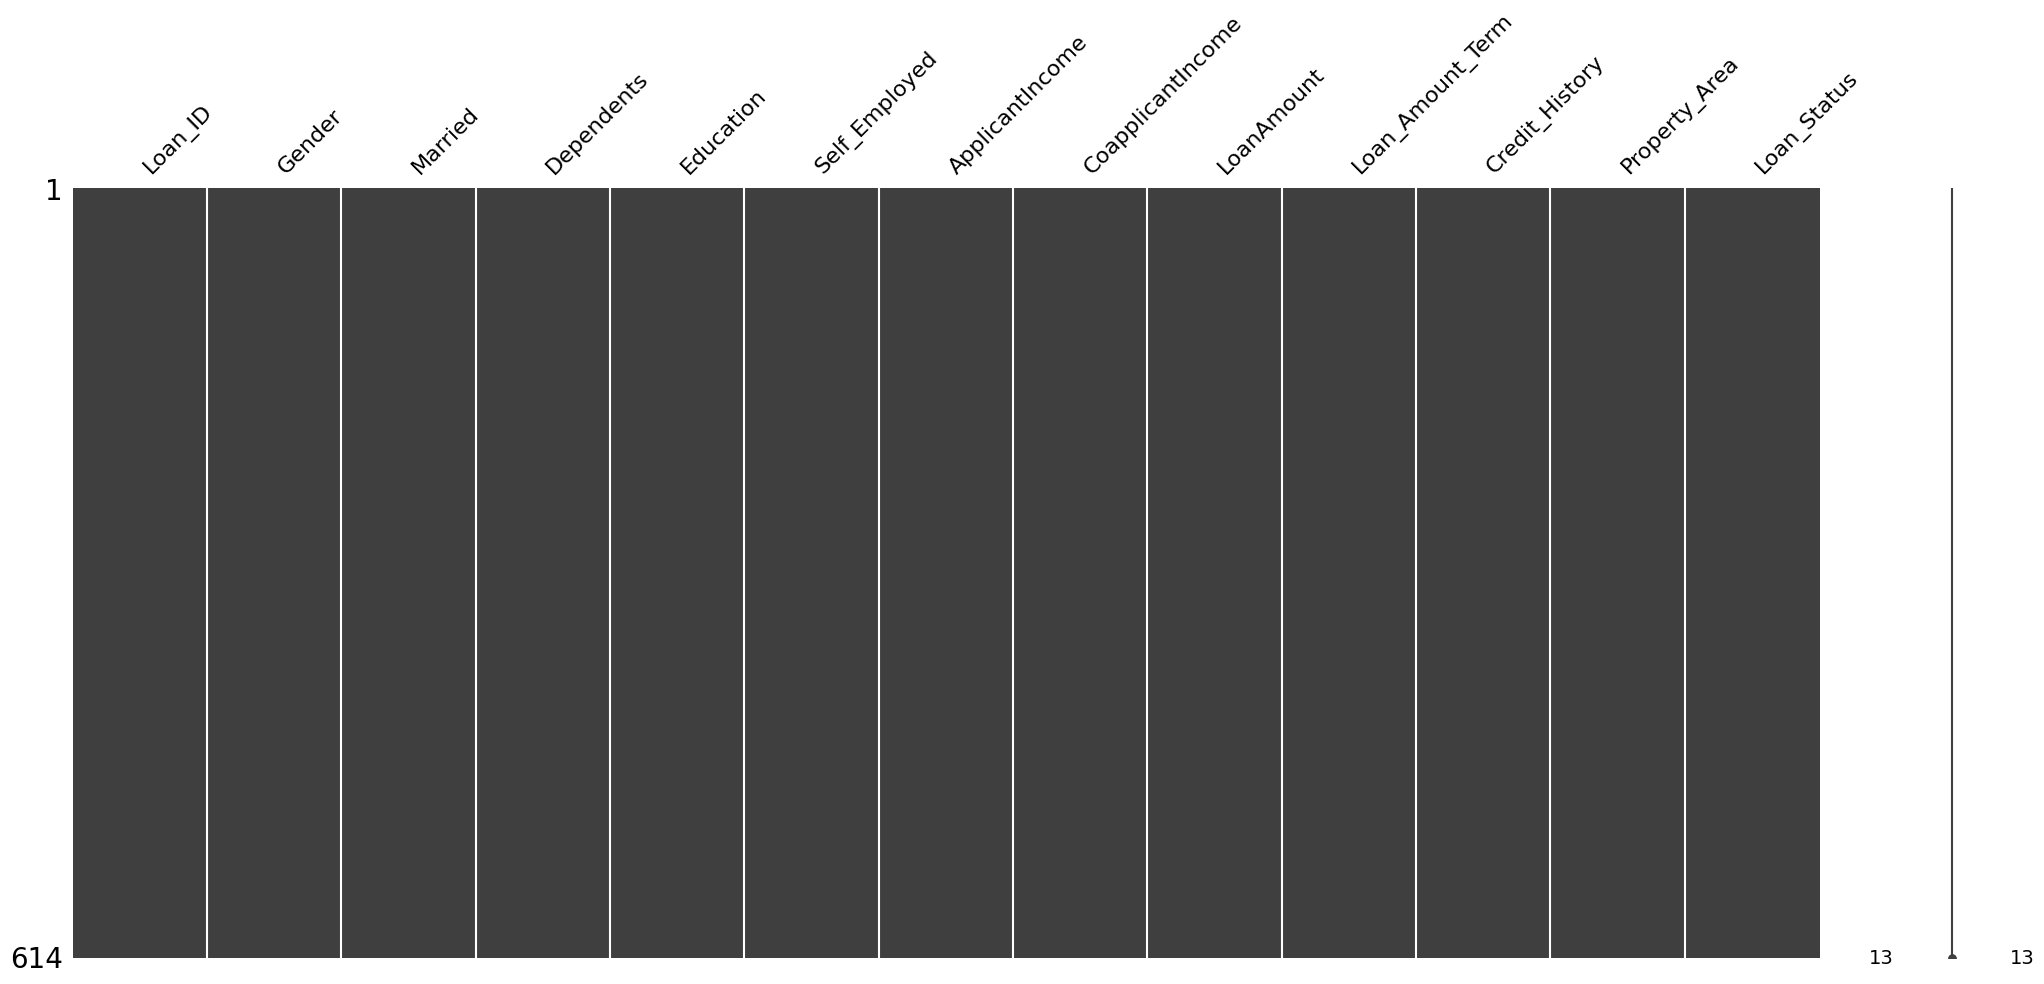

In [92]:
msno.matrix(traindf)

In [93]:
#Identify Duplicates Records
dupl=traindf.duplicated()
duplications = traindf[dupl]
duplications

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


EDA

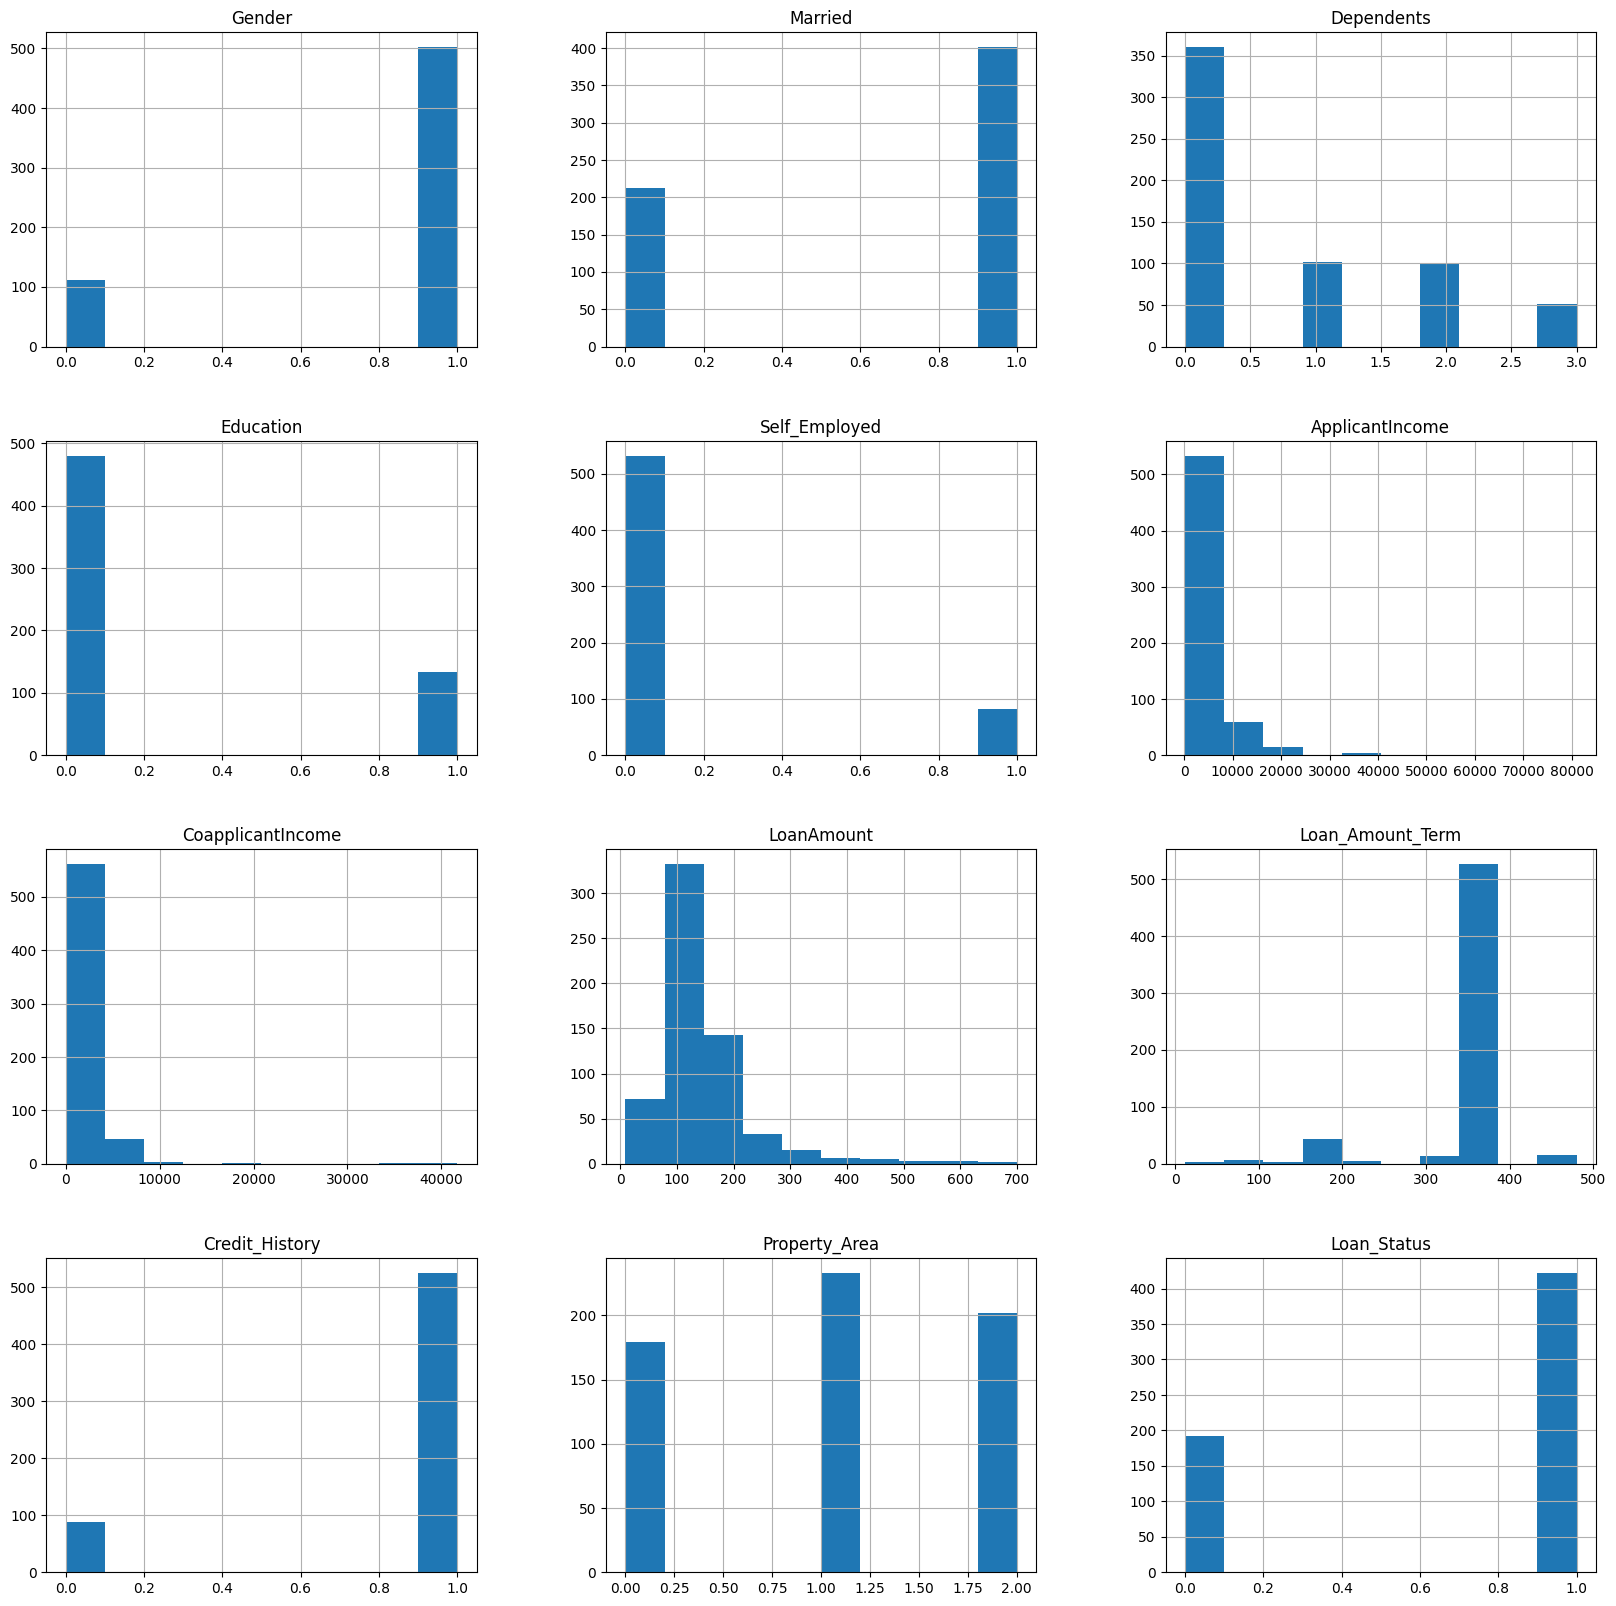

In [94]:
p = traindf.hist(figsize = (20,20))

In [95]:
from pandas.plotting import scatter_matrix


The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

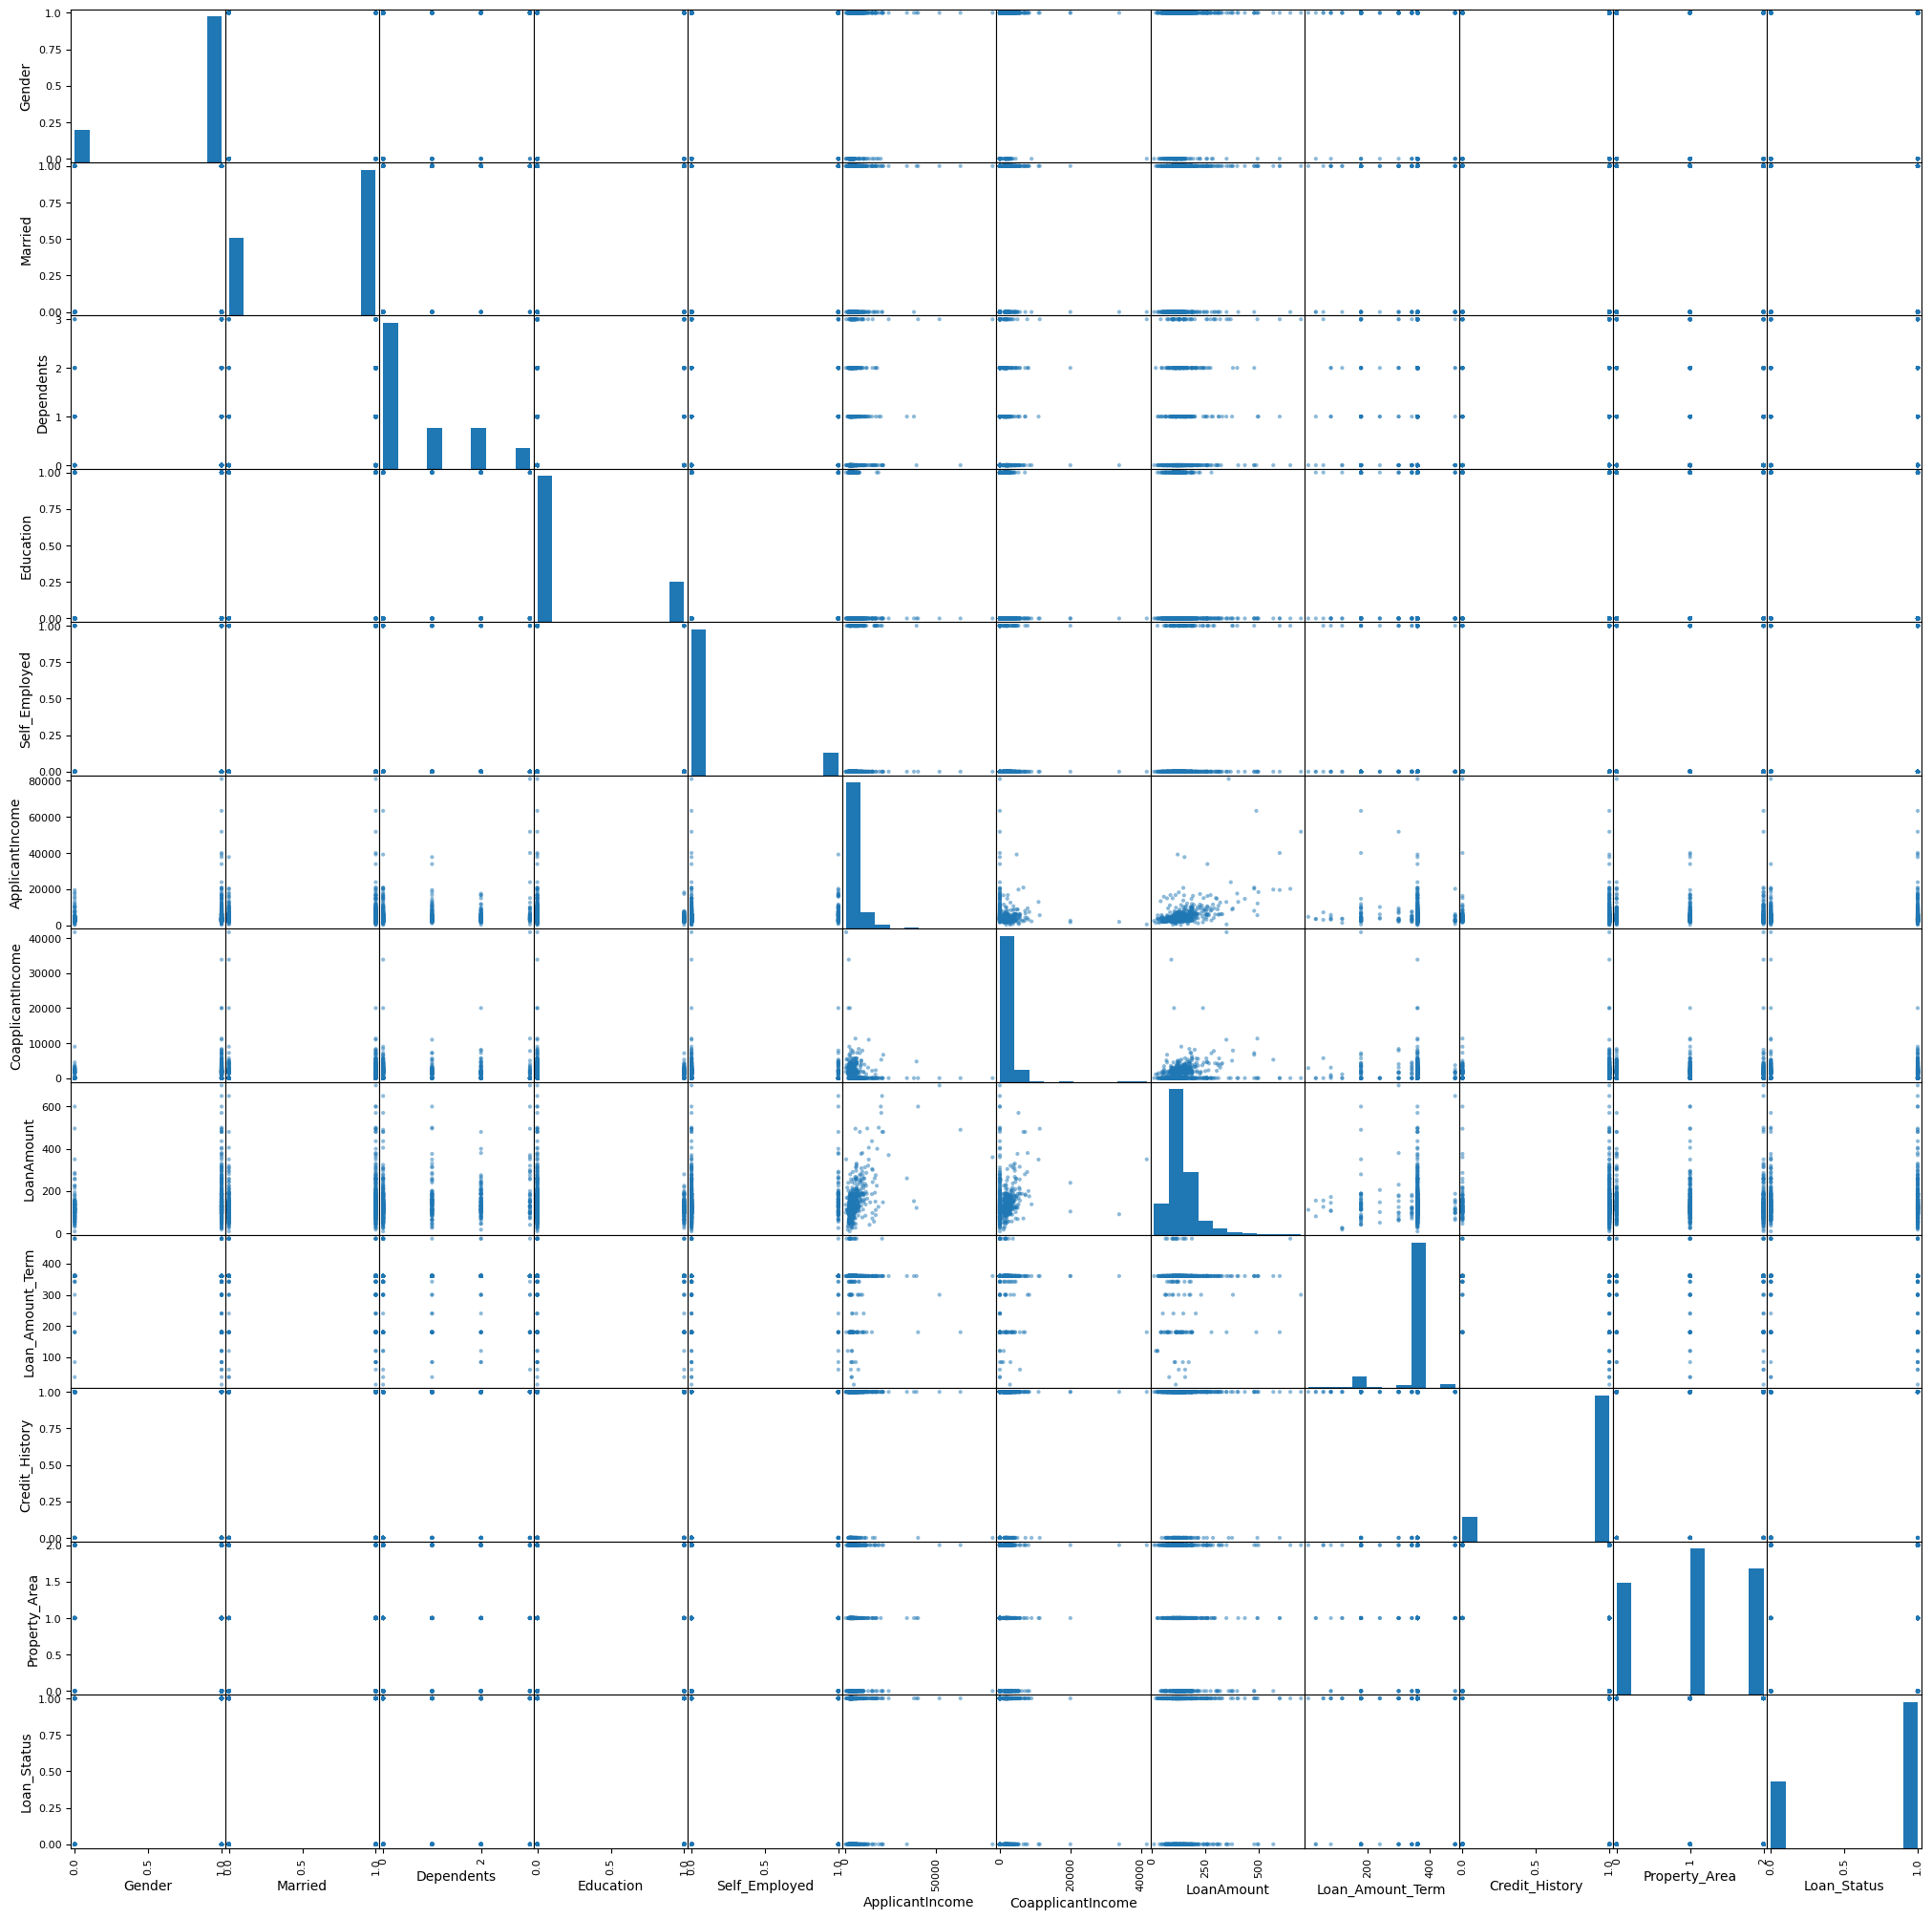

In [96]:

p=scatter_matrix(traindf,figsize=(25, 25))

In [97]:
import seaborn as sns

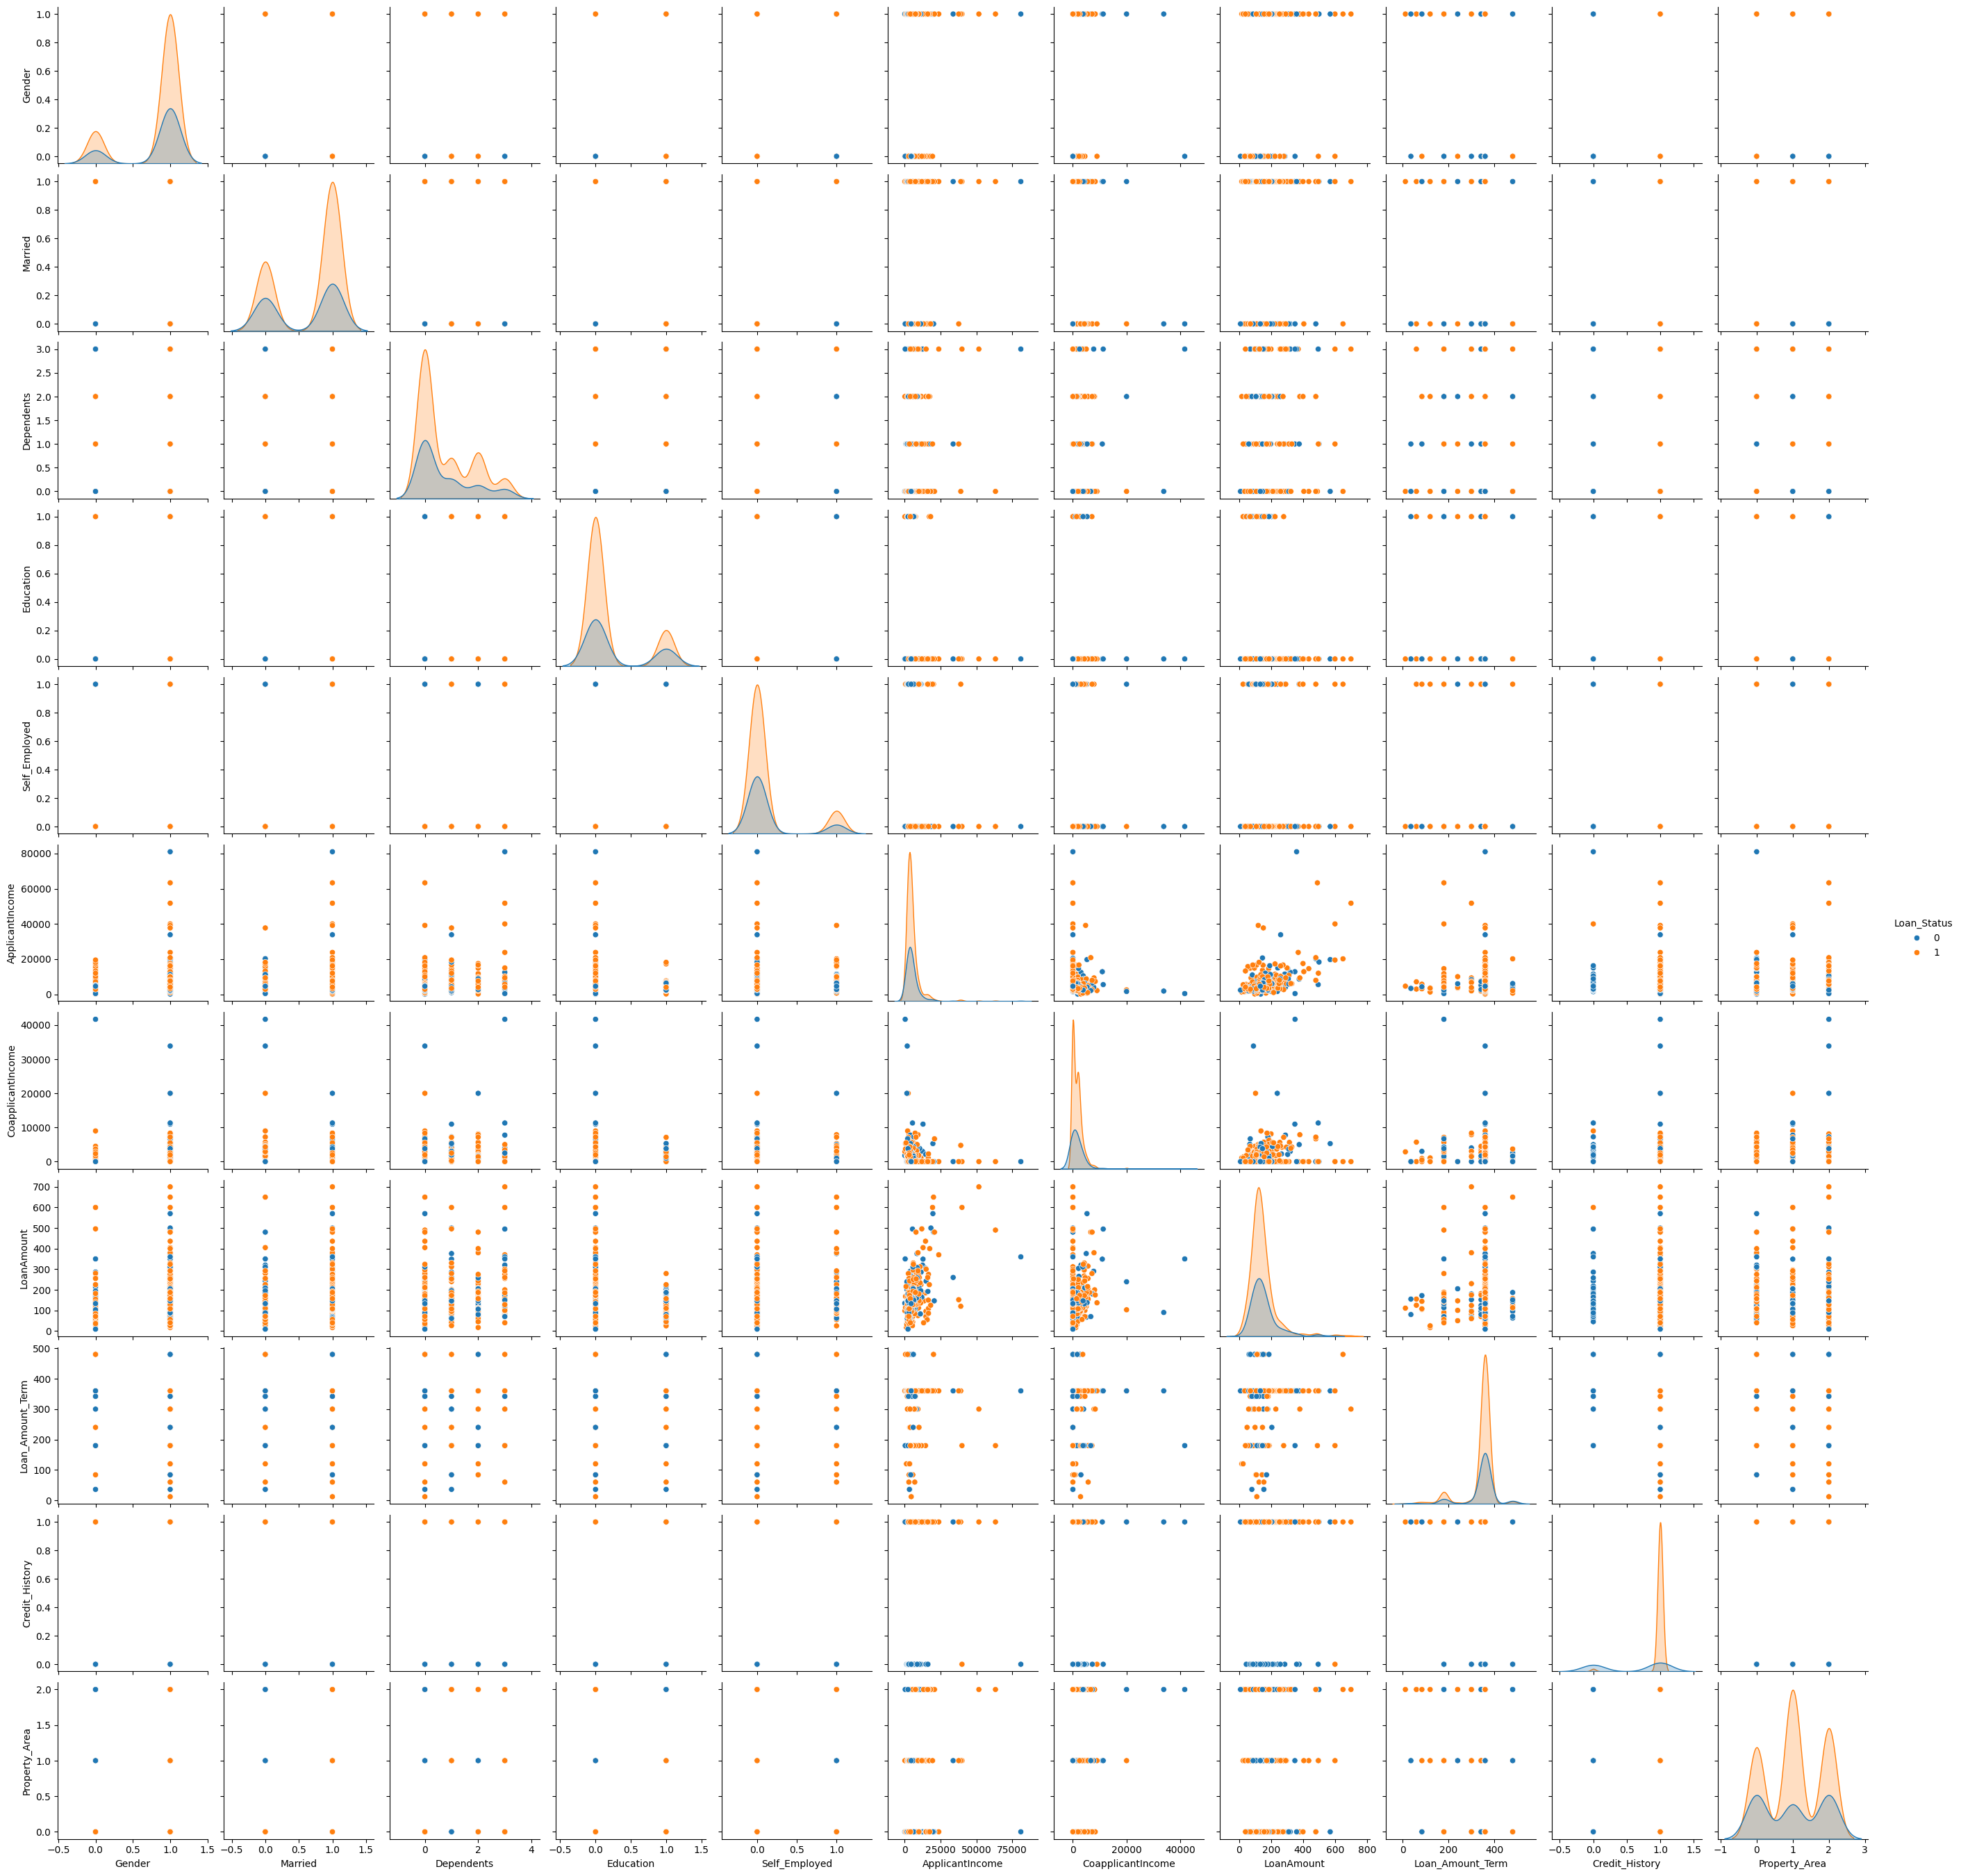

In [98]:
p=sns.pairplot(traindf, hue = 'Loan_Status')

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 62.5 KB


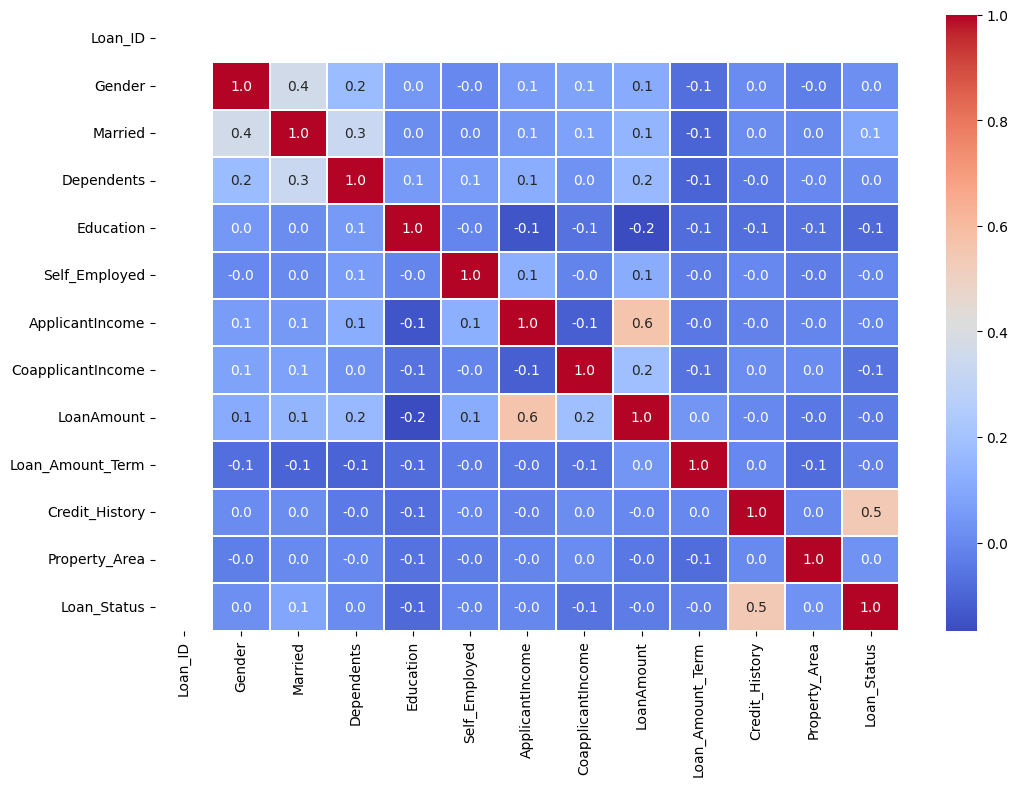

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(traindf.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Model Selection

In [107]:
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [116]:
feature_cols = ['Credit_History', 'Education', 'Gender']
X = traindf[feature_cols] # Features
y = traindf.Loan_Status # Target variable

In [117]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [118]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [119]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 21,  32],
       [  0, 101]], dtype=int64)

In [111]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = traindf[train_features].values
y_train = traindf['Loan_Status'].values

x_test = tesdf[train_features].values

In [112]:
logistic_model = LogisticRegression()

In [113]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [114]:
# Predict the model for testin data

predicted = logistic_model.predict(x_test)

ValueError: could not convert string to float: 'Graduate'

Model Evaluation

Modet testing

Model Intepretion